# 1. 데이터 load

In [2]:
import pandas as pd

train_data_path ="~/aiffel/dktc/data/train.csv"
train_data = pd.read_csv(train_data_path)
train_data.head()

,idx,class,conversation
0,0,협박 대화,지금 너 스스로를 죽여달라고 애원하는 것인가?\n 아닙니다. 죄송합니다.\n 죽을 ...
1,1,협박 대화,길동경찰서입니다.\n9시 40분 마트에 폭발물을 설치할거다.\n네?\n똑바로 들어 ...
2,2,기타 괴롭힘 대화,너 되게 귀여운거 알지? 나보다 작은 남자는 첨봤어.\n그만해. 니들 놀리는거 재미...
3,3,갈취 대화,어이 거기\n예??\n너 말이야 너. 이리 오라고\n무슨 일.\n너 옷 좋아보인다?...
4,4,갈취 대화,저기요 혹시 날이 너무 뜨겁잖아요? 저희 회사에서 이 선크림 파는데 한 번 손등에 ...


# 2. 데이터 확인

In [3]:
len(train_data)

3950

In [4]:
train_data.isnull().sum()

idx             0
class           0
conversation    0
dtype: int64

In [5]:
import numpy as np

# 길이 분포 출력
data_len = [len(s.split()) for s in train_data['conversation']]

print('데이터셋의 최소 길이 : {}'.format(np.min(data_len)))
print('데이터셋의 최대 길이 : {}'.format(np.max(data_len)))
print('데이터셋의 평균 길이 : {}'.format(np.mean(data_len)))

데이터셋의 최소 길이 : 10
데이터셋의 최대 길이 : 223
데이터셋의 평균 길이 : 57.089113924050636


In [6]:
#폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
The following packages were automatically installed and are no longer required:
  accountsservice-ubuntu-schemas bc bluez-obexd cups cups-browsed cups-client
  cups-common cups-core-drivers cups-daemon cups-filters
  cups-filters-core-drivers cups-ipp-utils cups-ppdc cups-server-common
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript
  gir1.2-dbusmenu-glib-0.4 gnome-bluetooth gnome-power-manager
  gnome-screensaver gsettings-ubuntu-schemas gvfs-backends indicator-applet
  indicator-application indicator-appmenu indicator-bluetooth indicator-common
  indicator-datetime indicator-keyboard indicator-messages indicator-power
  indicator-printers indicator-session indicator-sound jayatana
  libaccounts-glib0 libbamf3-2 libcdio-cdda2 libcdio-paranoia2 libcdio18
  libcupsfilters1 libfcitx-config4 libfcitx-gclient1 libfcitx-u

In [7]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

<AxesSubplot:xlabel='class', ylabel='count'>

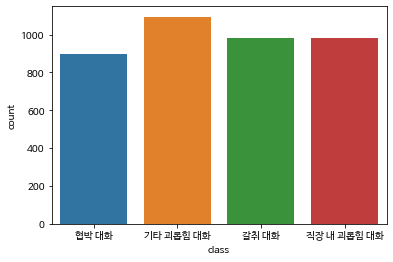

In [8]:
import seaborn as sns
sns.countplot(x = train_data['class'])

# 토큰화 -> 형태소 분석

mecab 형태소 분석기

In [90]:
from konlpy.tag import Mecab

tokenizer=[]
for x in train_data['conversation']:
    
    temp=mecab.morphs(x)
    
    for y in temp:
        
        tokenizer.append(y)
        
len(tokenizer)

459258

---

kiwipiepy 형태소 분석기

In [9]:
!pip install kiwipiepy

     |████████████████████████████████| 3.1 MB 4.8 MB/s            
     |████████████████████████████████| 34.7 MB 64.8 MB/s            
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.18.0-py3-none-any.whl size=34843392 sha256=261cfd07db5ee20455f9c577fcb83e523d62072fc461309bf26c6aa2e39ca076
  Stored in directory: /aiffel/.cache/pip/wheels/b5/6f/a2/4dfdcd841142b2f6064467dfd121c01f3311f9353c8fe304d9
Successfully built kiwipiepy-model


In [10]:
from kiwipiepy import Kiwi

kiwi=Kiwi()
tokens=[]

for x in train_data['conversation']:
    
    result=kiwi.tokenize(x)
    
    for y in result:
        
        tokens.append(y[0])
        
len(tokens)

524172

In [11]:
tokens

['지금',
 '너',
 '스스로',
 '를',
 '죽이',
 '어',
 '달',
 '라고',
 '애원',
 '하',
 '는',
 '것',
 '이',
 'ᆫ가',
 '?',
 '아니',
 'ᆸ니다',
 '.',
 '죄송',
 '하',
 'ᆸ니다',
 '.',
 '죽',
 '을',
 '거',
 '이',
 '면',
 '혼자',
 '죽',
 '지',
 '우리',
 '까지',
 '사건',
 '에',
 '휘말리',
 '게',
 '하',
 '어',
 '?',
 '진짜',
 '죽이',
 '어',
 '버리',
 '고',
 '싶',
 '게',
 '.',
 '정말',
 '잘못',
 '하',
 '었',
 '습니다',
 '.',
 '너',
 '가',
 '선택',
 '하',
 '어',
 '.',
 '너',
 '가',
 '죽',
 '을래',
 '너',
 '의',
 '가족',
 '을',
 '죽이',
 '어',
 '주',
 'ᆯ까',
 '.',
 '죄송',
 '하',
 'ᆸ니다',
 '.',
 '정말',
 '잘못',
 '하',
 '었',
 '습니다',
 '.',
 '너',
 '에게',
 '는',
 '선택',
 '권',
 '이',
 '없',
 '어',
 '.',
 '선택',
 '못',
 '하',
 'ᆫ다면',
 '너',
 '와',
 '너',
 '의',
 '가족',
 '까지',
 '모조리',
 '죽이',
 '어',
 '버리',
 'ᆯ',
 '거',
 '이',
 '야',
 '.',
 '선택',
 '못',
 '하',
 '겠',
 '습니다',
 '.',
 '한',
 '번',
 '만',
 '돕',
 '어',
 '주',
 '세요',
 '.',
 '그냥',
 '다',
 '죽이',
 '어',
 '버리',
 '어야',
 '겠',
 '군',
 '.',
 '이의',
 '없',
 '지',
 '?',
 '제발',
 '도와주',
 '세요',
 '.',
 '길동',
 '경찰서',
 '이',
 'ᆸ니다',
 '.',
 '9',
 '시',
 '40',
 '분',
 '마트',
 '에',
 '폭발물',
 '을',
 '설치'

----------------

바른 형태소 분석기

In [67]:
!pip3 install bareunpy

     |████████████████████████████████| 220 kB 5.2 MB/s            
     |████████████████████████████████| 1.0 MB 60.6 MB/s            
     |████████████████████████████████| 5.8 MB 63.7 MB/s            
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.19.1
    Uninstalling protobuf-3.19.1:
      Successfully uninstalled protobuf-3.19.1
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.42.0
    Uninstalling grpcio-1.42.0:
      Successfully uninstalled grpcio-1.42.0
  Attempting uninstall: googleapis-common-protos
    Found existing installation: googleapis-common-protos 1.53.0
    Uninstalling googleapis-common-protos-1.53.0:
      Successfully uninstalled googleapis-common-protos-1.53.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-gpu 2.6.0 requires numpy~=1.19.2, but you have numpy 1.21.4 whi

In [79]:
!curl -OLJs -H "uname:$(uname -a)" https://bareun.ai/api/get

In [80]:
!sudo apt install ./bareun-v2.3.0.linux-x86_64.deb

Reading package lists... Done
E: Unsupported file ./bareun-v2.3.0.linux-x86_64.deb given on commandline


In [81]:
!systemctl status bareun

System has not been booted with systemd as init system (PID 1). Can't operate.
Failed to connect to bus: Host is down


In [91]:
import sys
import google.protobuf.text_format as tf
from bareunpy import Tokenizer

# You can get an API-KEY from https://bareun.ai/
# Please note that you need to sign up and verify your email.
# 아래에 "https://bareun.ai/"에서 이메일 인증 후 발급받은 API KEY("koba-...")를 입력해주세요. "로그인-내정보 확인"
API_KEY = "koba-VRONXMI-K4AUA2Q-Q3GPS6Y-JB7LZ3I" # <- 본인의 API KEY로 교체(Replace this with your own API KEY)

# If you have your own localhost bareun.
my_tokenizer = Tokenizer(API_KEY, 'localhost')


# print results. 
tokenized = my_tokenizer.tokenize_list(["안녕하세요.", "반가워요!"])

# get protobuf message.
m = tokenized.msg()
tf.PrintMessage(m, out=sys.stdout, as_utf8=True)
print(tf.MessageToString(m, as_utf8=True))
print(f'length of sentences is {len(m.sentences)}')
## output : 2
print(f'length of tokens in sentences[0] is {len(m.sentences[0].tokens)}')
print(f'length of segments of first token in sentences[0] is {len(m.sentences[0].tokens[0].segments)}')
print(f'tagged of first token in sentences[0] is {m.sentences[0].tokens[0].tagged}')
print(f'first segment of first token in sentences[0] is {m.sentences[0].tokens[0].segments[0]}')
print(f'hint of first morph of first token in sentences[0] is {m.sentences[0].tokens[0].segments[0].hint}')

## Advanced usage.
for sent in m.sentences:
    for token in sent.tokens:
        for m in token.segments:
            print(f'{m.text.content}/{m.hint}')

# get json object
jo = tokenized.as_json()
print(jo)

# get tuple of segments
ss = tokenized.segments()
print(ss)
ns = tokenized.nouns()
print(ns)
vs = tokenized.verbs()
print(vs)
# postpositions: 조사
ps = tokenized.postpositions()
print(ps)
# Adverbs, 부사
ass = tokenized.adverbs()
print(ass)
ss = tokenized.symbols()
print(ss)


Exception: 
서버에 연결할 수 없습니다. 입력한 서버주소 [localhost:5656]가 정확한지 확인해 주세요.
서버 메시지: failed to connect to all addresses; last error: UNKNOWN: ipv4:127.0.0.1:5656: Failed to connect to remote host: connect: Connection refused (111)

----

In [12]:
from collections import Counter
from kiwipiepy import Kiwi

# 2. 데이터 정제 함수

def preprocess_sentence(sentence):

    # 앞뒤 공백 제거
    sentence = sentence.strip()
    # 한글, 영어, 숫자, 구두점 외 제거
    sentence = re.sub(r"[^가-힣ㄱ-ㅎㅏ-ㅣa-zA-Z0-9.,!? ]", " ", sentence)
    # 단어와 구두점(punctuation) 사이의 거리를 만듭니다.
    # 예를 들어서 "I am a student." => "I am a student ."와 같이
    # student와 온점 사이에 거리를 만듭니다.
    sentence = re.sub(r"([?.!,])", r" \1 ", sentence)
    sentence = re.sub(r'[" "]+', " ", sentence)
    # 다중 공백을 단일 공백으로
    sentence = re.sub(r"\s+", " ", sentence)
    
    # ㅋㅋ, ㅎㅎ, ㅠㅠ 등을 정규화
    sentence = re.sub(r'ㅋ{2,}', 'ㅋㅋ', sentence)  # 연속된 ㅋ를 ㅋㅋ로 통일
    sentence = re.sub(r'ㅎ{2,}', 'ㅎㅎ', sentence)  # 연속된 ㅎ를 ㅎㅎ로 통일
    sentence = re.sub(r'ㅠ{2,}', 'ㅠㅠ', sentence)  # 연속된 ㅠ를 ㅠㅠ로 통일

    return sentence

# 3. 단어 사전 구축
def build_vocab(data):

    kiwi=Kiwi()
    tokens = []

    for sentence in data:
        
        cleaned = clean_text(sentence)

        result = kiwi.tokenize(cleaned)

        for x in result:

            tokens.append(x[0])
    
    # 단어의 빈도수 계산
    word_counts = Counter(tokens)
    
    # 고유한 단어 리스트 만들기 (빈도수 기준으로 정렬)
    vocab = {word: i for i, (word, _) in enumerate(word_counts.most_common())}
    
    return vocab

# 2. 데이터 정제
clean_data=[]

for x in train_data['conversation']:
    clean_data.append(preprocess_sentence(x))

# 4. 단어 사전 생성
vocab = build_vocab(clean_data)

# 5. 단어 사전 출력
print("단어 사전:", vocab)
print("단어 수:", len(vocab))

단어 사전: {'어': 0, '.': 1, '이': 2, '하': 3, '?': 4, '가': 5, '나': 6, '는': 7, 'ᆫ': 8, '었': 9, '야': 10, '거': 11, '고': 12, 'ᆯ': 13, '너': 14, '지': 15, '주': 16, '말': 17, '도': 18, '네': 19, '에': 20, '안': 21, '아니': 22, '보': 23, '어서': 24, '다': 25, '게': 26, '있': 27, '되': 28, '면': 29, '은': 30, '을': 31, '겠': 32, '없': 33, '저': 34, '어요': 35, '시': 36, '알': 37, '뭐': 38, 'ᆸ니다': 39, '왜': 40, '만': 41, '것': 42, '아': 43, '니': 44, '좀': 45, '그렇': 46, '돈': 47, '님': 48, '습니다': 49, '오': 50, '!': 51, '들': 52, '요': 53, '의': 54, '세요': 55, '냐': 56, '는데': 57, '일': 58, '못': 59, 'ᆫ데': 60, '진짜': 61, '를': 62, '라고': 63, '지금': 64, '같': 65, '어야': 66, '로': 67, '기': 68, '한테': 69, '이거': 70, '그러': 71, '우리': 72, '잘': 73, '그': 74, '않': 75, '무슨': 76, '잖아': 77, '으로': 78, '그거': 79, '좋': 80, '죄송': 81, '그럼': 82, '사람': 83, '그냥': 84, '으면': 85, '죽': 86, '내': 87, '한': 88, '수': 89, '까지': 90, '제발': 91, '라': 92, '맞': 93, '싶': 94, '죄송하': 95, '자': 96, '에서': 97, '사': 98, '다고': 99, '오늘': 100, '니까': 101, '먹': 102, '여기': 103, '더': 104, '번': 105, '쓰': 

In [18]:
vocab_size=len(vocab)

# 시작 토큰과 종료 토큰에 고유한 정수를 부여합니다.
START_TOKEN, END_TOKEN = [vocab_size], [vocab_size + 1]

vocab_size=vocab_size+2

In [19]:
vocab_size

9990

In [ ]:
# 길이 분포 출력
data_len = [len(s.split()) for s in clean_data]

print('전처리된 데이터셋의 최소 길이 : {}'.format(np.min(data_len)))
print('전처리된 데이터셋의 최대 길이 : {}'.format(np.max(data_len)))
print('전처리된 데이터셋의 평균 길이 : {}'.format(np.mean(data_len)))

In [ ]:
# 6. 인덱스 변환 예시 (문장을 숫자 시퀀스로 변환)
def sentence_to_sequence(sentence, vocab):
    tokens = Okt().morphs(clean_text(sentence))  # 문장 토큰화
    return [vocab.get(token, -1) for token in tokens]  # 단어를 인덱스로 변환, 미등록 단어는 -1로 설정

# 예시 문장 변환
example_sentence = train_df['conversation'][0]  # 첫 번째 대화 내용
sequence = sentence_to_sequence(example_sentence, vocab)
print("숫자 시퀀스:", sequence)